# Verification experiment - NARMAX


In this experiment, I generate data according to a NARMAX model and recover parameters.

In [1]:
using Revise
using ProgressMeter
using LinearAlgebra
using Plots
pyplot();

## Data generation

In [2]:
# Orders
M1 = 3
M2 = 2
M3 = 4
M = M1+1+M2+M3
degree = 1

# Parameters
# θ_true = 0.1 .*rand(M*degree+1,)
θ_true = .2 .*randn(M,)
τ_true = 1e4

# Time horizon
T = 10000

# Nonlinearity
# P = zeros(M,1); for d=1:degree; P = hcat(d .*Matrix{Float64}(I,M,M), P); end
# ϕ(x::Array{Float64,1}) = [prod(x.^P[:,k]) for k = 1:size(P,2)]
ϕ(x::Array{Float64,1}) = x

# Input frequency and amplitude
ω = 1/(2*π)
A = 1.

# Observation array
input = zeros(T,)
output = zeros(T,)
errors = zeros(T,)

# First outputs
output[1:M1] .= 0.0

for k = 1:T
    
    # Input
    input[k] = A*cos(ω*k)
    
    # Generate noise
    errors[k] = sqrt(inv(τ_true))*randn(1)[1]
   
    # Output
    if k < M
        output[k] = input[k] + errors[k]
    else
        # Update history vectors
        x_kmin1 = output[k-1:-1:max(1,k-M1)]
        z_kmin1 = input[k-1:-1:max(1,k-M2)]
        r_kmin1 = errors[k-1:-1:max(1,k-M3)]
        
        # Compute output
        output[k] = θ_true'*ϕ([x_kmin1; input[k]; z_kmin1; r_kmin1]) + errors[k]
    end
end

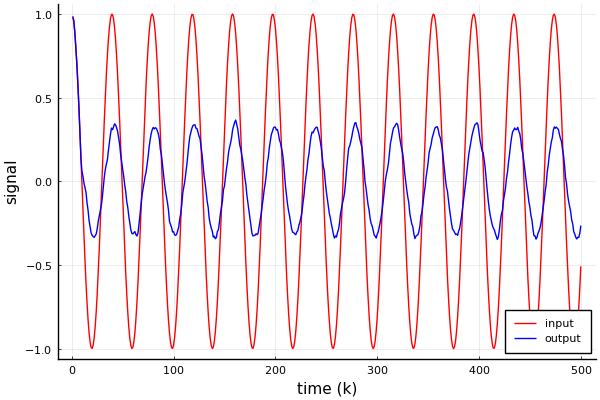

In [3]:
tt = 1

if T > 500
    plot(1:tt:500, input[1:tt:500], color="red", label="input", xlabel="time (k)", ylabel="signal")
    plot!(1:tt:500, output[1:tt:500], color="blue", label="output", xlabel="time (k)", ylabel="signal")
else
    plot(1:tt:T, input[1:tt:T], color="red", label="input", xlabel="time (k)", ylabel="signal")
    plot!(1:tt:T, output[1:tt:T], color="blue", label="output", xlabel="time (k)", ylabel="signal")
end

## Model specification

In [4]:
using ForneyLab
import ForneyLab: unsafeMean, unsafeCov

In [5]:
using NARMAX

In [6]:
graph = FactorGraph()

# Observed variables
@RV x_kmin1; placeholder(x_kmin1, :x_kmin1, dims=(M1,))
@RV z_kmin1; placeholder(z_kmin1, :z_kmin1, dims=(M2,))
@RV r_kmin1; placeholder(r_kmin1, :r_kmin1, dims=(M3,))
@RV u_k; placeholder(u_k, :u_k)

# Time-invariant parameters
# @RV θ ~ GaussianMeanVariance(placeholder(:m_θ, dims=(M*3+1,)), placeholder(:v_θ, dims=(M*3+1, M*3+1)))
@RV θ ~ GaussianMeanVariance(placeholder(:m_θ, dims=(M,)), placeholder(:v_θ, dims=(M, M)))
@RV τ ~ Gamma(placeholder(:a_τ), placeholder(:b_τ))

# Likel7ihood
@RV y_k ~ NAutoRegressiveMovingAverageX(θ, x_kmin1, u_k, z_kmin1, r_kmin1, τ, g=ϕ)
placeholder(y_k, :y_k)

ForneyLab.draw(graph)

<?xml version="1.0" encoding="UTF-8" standalone="no"?>
<!DOCTYPE svg PUBLIC "-//W3C//DTD SVG 1.1//EN"
 "http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd">
<!-- Generated by graphviz version 2.40.1 (20161225.0304)
 -->
<!-- Title: G Pages: 1 -->
 
 
 G 
 
<!-- 1336755501850515542 -->
 
 1336755501850515542 
 
 placeholder_b_τ 
 
<!-- 16911520218259301230 -->
 
 16911520218259301230 
 
 placeholder_x_kmin1 
 
<!-- 11624332540786540407 -->
 
 11624332540786540407 
 
 placeholder_a_τ 
 
<!-- 13170950898271609822 -->
 
 13170950898271609822 
 
 placeholder_u_k 
 
<!-- 11133059082107777732 -->
 
 11133059082107777732 
 
 Gam 
 gamma_1 
 
<!-- 11133059082107777732--1336755501850515542 -->
 
 11133059082107777732--1336755501850515542 
 
 b_τ 
 1 out 
 3 b 
 
<!-- 11133059082107777732--11624332540786540407 -->
 
 11133059082107777732--11624332540786540407 
 
 a_τ 
 1 out 
 2 a 
 
<!-- 11050905040109247679 -->
 
 11050905040109247679 
 
 placeholder_m_θ 
 
<!-- 1369280522505280529 -->
 
 1369280522505280529 
 
 placeholder_z_kmin1 
 
<!-- 17812232829823217928 -->
 
 17812232829823217928 
 
 placeholder_r_kmin1 
 
<!-- 17090871502469718080 -->
 
 17090871502469718080 
 
 NARMAX 
 nautoregressivemovingaveragex_1 
 
<!-- 17090871502469718080--16911520218259301230 -->
 
 17090871502469718080--16911520218259301230 
 
 x_kmin1 
 1 out 
 3 x 
 
<!-- 17090871502469718080--13170950898271609822 -->
 
 17090871502469718080--13170950898271609822 
 
 u_k 
 1 out 
 4 u 
 
<!-- 17090871502469718080--11133059082107777732 -->
 
 17090871502469718080--11133059082107777732 
 
 τ 
 1 out 
 7 τ 
 
<!-- 17090871502469718080--1369280522505280529 -->
 
 17090871502469718080--1369280522505280529 
 
 z_kmin1 
 1 out 
 5 z 
 
<!-- 17090871502469718080--17812232829823217928 -->
 
 17090871502469718080--17812232829823217928 
 
 r_kmin1 
 1 out 
 6 r 
 
<!-- 11215765183389866482 -->
 
 11215765183389866482 
 
 𝒩 
 gaussianmeanvariance_1 
 
<!-- 17090871502469718080--11215765183389866482 -->
 
 17090871502469718080--11215765183389866482 
 
 θ 
 1 out 
 2 θ 
 
<!-- 11215765183389866482--11050905040109247679 -->
 
 11215765183389866482--11050905040109247679 
 
 m_θ 
 1 out 
 2 m 
 
<!-- 3626294068905027774 -->
 
 3626294068905027774 
 
 placeholder_v_θ 
 
<!-- 11215765183389866482--3626294068905027774 -->
 
 11215765183389866482--3626294068905027774 
 
 v_θ 
 1 out 
 3 v 
 
<!-- 9978793194386378701 -->
 
 9978793194386378701 
 
 placeholder_y_k 
 
<!-- 9978793194386378701--17090871502469718080 -->
 
 9978793194386378701--17090871502469718080 
 
 y_k 
 1 y 
 1 out

In [7]:
q = PosteriorFactorization(θ, τ, ids=[:θ :τ])
algorithm = messagePassingAlgorithm([θ; τ], q)
source_code = algorithmSourceCode(algorithm)
eval(Meta.parse(source_code));

In [8]:
# Preallocate parameter arrays
# params_θ = (.1 .*ones(M*degree+1, T+1), repeat(Matrix{Float64}(I, M*degree+1, M*degree+1), outer=(1,1, T+1)))
params_θ = (.2 .*ones(M, T+1), repeat(10 .*Matrix{Float64}(I, M, M), outer=(1,1, T+1)))
params_τ = (1e4 .*ones(T+1,), 1. .*ones(T+1,))

marginals = Dict(:θ => ProbabilityDistribution(Multivariate, GaussianMeanVariance, m=params_θ[1][:,1], v=params_θ[2][:,:,1]),
                 :τ => ProbabilityDistribution(Univariate, Gamma, a=params_τ[1][1], b=params_τ[2][1]))

# Keep track of residuals
predictions = (zeros(T+1,), zeros(T+1,2))
residuals = zeros(T,)

@showprogress for k = max(M1,M2,M3)+1:T
    
    # Update history vectors
    x_kmin1 = output[k-1:-1:k-M1]
    z_kmin1 = input[k-1:-1:k-M2]
    r_kmin1 = residuals[k-1:-1:k-M3]
    
    # Predictions
    predictions[1][k] = params_θ[1][:,k]'*ϕ([x_kmin1; input[k]; z_kmin1; r_kmin1])
    predictions[2][k] = ϕ([x_kmin1; input[k]; z_kmin1; r_kmin1])'*params_θ[2][:,:,k]'*ϕ([x_kmin1; input[k]; z_kmin1; r_kmin1])
    
    # Compute prediction error
    residuals[k] = output[k] - predictions[1][k]
    
    # Set data 
    data = Dict(:y_k => output[k],
                :u_k => input[k],
                :x_kmin1 => x_kmin1,
                :z_kmin1 => z_kmin1,
                :r_kmin1 => r_kmin1,
                :m_θ => params_θ[1][:,k],
                :v_θ => params_θ[2][:,:,k],
                :a_τ => params_τ[1][k],
                :b_τ => params_τ[2][k])
    
    # Iterate updates
    for n = 1:10
        stepθ!(data, marginals)
        stepτ!(data, marginals)
    end    
    
    # Update params
    params_θ[1][:,k+1] = unsafeMean(marginals[:θ])
    params_θ[2][:,:,k+1] = unsafeCov(marginals[:θ])
    params_τ[1][k+1] = marginals[:τ].params[:a]
    params_τ[2][k+1] = marginals[:τ].params[:b]
    
end

Progress: 100%|█████████████████████████████████████████| Time: 0:00:10


## Visualization

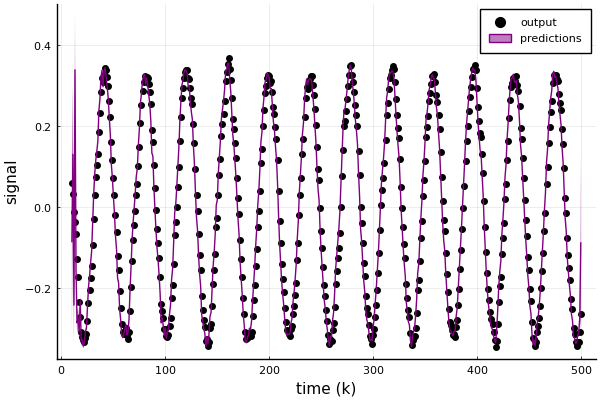

In [36]:
tt = 1
if T > 500
    scatter(M:tt:500, output[M:tt:500], color="black", label="output", xlabel="time (k)", ylabel="signal")
    plot!(M:tt:500, predictions[1][M+1:tt:500], ribbon=[sqrt.(predictions[2][M+1:tt:end]), sqrt.(predictions[2][M+1:tt:end])], color="purple", label="predictions")    
else
    scatter(M:tt:T, output[M:tt:end], color="black", label="output", xlabel="time (k)", ylabel="signal")
    plot!(M:tt:T, predictions[1][M+1:tt:end], ribbon=[sqrt.(predictions[2][M+1:tt:end]), sqrt.(predictions[2][M+1:tt:end])], color="purple", label="predictions")
end

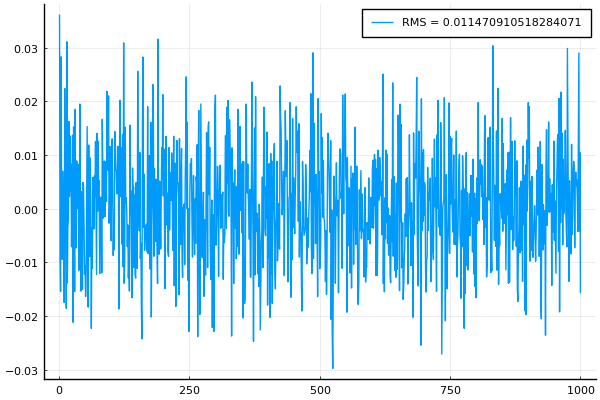

In [37]:
tt = 10
error = predictions[1][1:T] - output[1:T]
RMS = sqrt(mean(error[M:end].^2))

plot(error[M:tt:end], label="RMS = "*string(RMS))

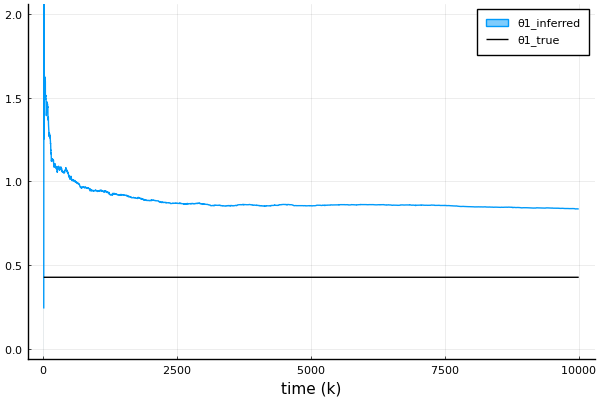

In [11]:
plot(M:T, params_θ[1][1,M+1:end], ribbon=[params_θ[2][1,1,M+1:end] params_θ[2][1,1,M+1:end]], xlabel="time (k)", label="θ1_inferred")
plot!(M:T, θ_true[1]*ones(T-M,), color="black", label="θ1_true", ylims=[0, 2])

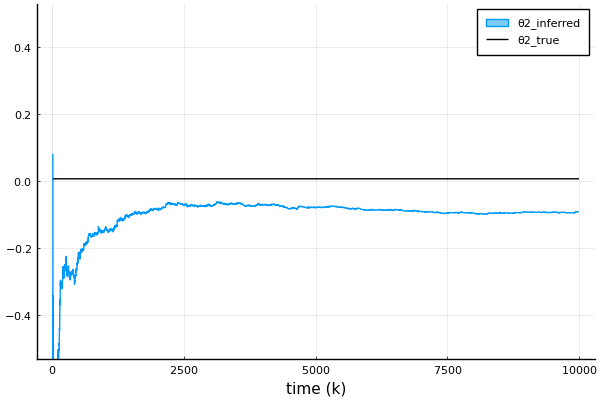

In [12]:
plot(M:T, params_θ[1][2,M+1:end], ribbon=[params_θ[2][2,2,M+1:end] params_θ[2][2,2,M+1:end]], xlabel="time (k)", label="θ2_inferred")
plot!(M:T, θ_true[2]*ones(T-M,), color="black", label="θ2_true", ylims=[-0.5,0.5])

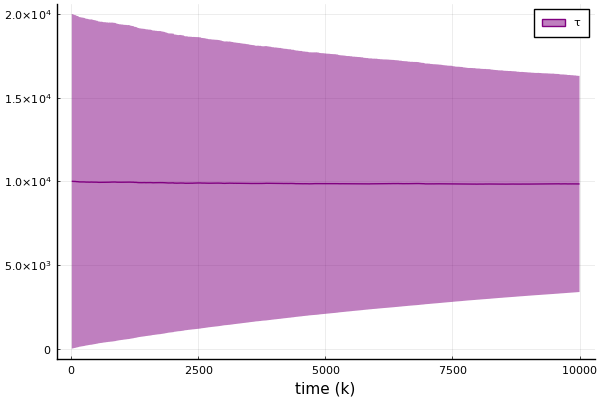

In [13]:
mτ = params_τ[1][2:end] ./ params_τ[2][2:end]
vτ = params_τ[1][2:end] ./ params_τ[2][2:end].^2

plot(M:T, mτ[M:end], ribbon=[vτ[M:end] vτ[M:end]], color="purple", xlabel="time (k)", label="τ")

## Baseline

Recursive least-squares filter ([wiki](https://en.wikipedia.org/wiki/Recursive_least_squares_filter#Recursive_algorithm))

In [30]:
# Parameters
p = M2+1
λ = 1.

# Initialization
w = zeros(p+1,T)
P = zeros(p+1,p+1,T)
x_k = zeros(p+1,);

In [31]:
# Preallocate prediction array
predictions_RLS = zeros(T,)

w_kmin1 = zeros(p+1,)
P_kmin1 = Matrix{Float64}(I,p+1,p+1)

for k = p+1:T
    
    # Update input history vector
    x_k = input[k:-1:k-p]
    
    # Update weights
    α_k = output[k] - w_kmin1'*x_k
    g_k = P_kmin1*x_k*inv(λ + x_k'*P_kmin1*x_k)
    P[:,:,k] = inv(λ)*P_kmin1 - g_k*x_k'*inv(λ)*P_kmin1
    w[:,k] = w_kmin1 + α_k*g_k
    
    # Prediction
    predictions_RLS[k] = w[:,k]'*x_k        
    
    # Update previous weights
    w_kmin1 = w[:,k]
    P_kmin1 = P[:,:,k]
end

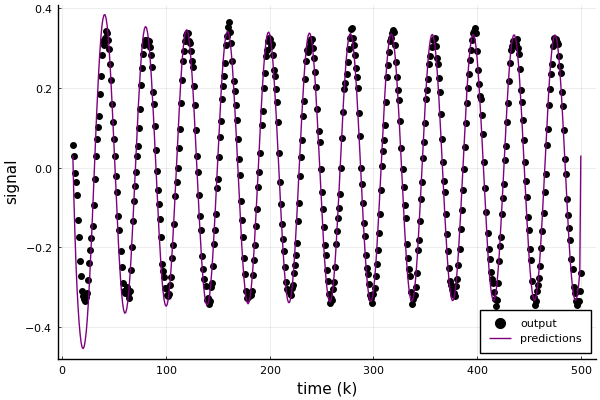

In [32]:
tt = 1

if T > 500
    scatter(M:tt:500, output[M:tt:500], color="black", label="output", xlabel="time (k)", ylabel="signal")
    plot!(M:tt:500, predictions_RLS[M+1:tt:500], color="purple", label="predictions")
else
    scatter(M:tt:T, output[M:tt:end], color="black", label="output", xlabel="time (k)", ylabel="signal")
    plot!(M:tt:T, predictions_RLS[M+1:tt:end], color="purple", label="predictions")
end

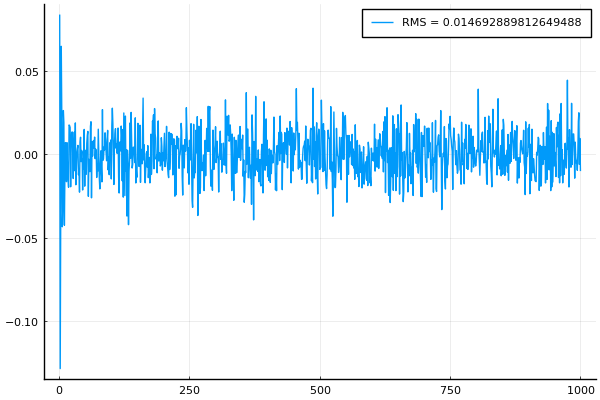

In [33]:
tt = 10
error_RLS = predictions_RLS[1:T] - output[1:T]
RMS_RLS = sqrt(mean(error_RLS[M:end].^2))

plot(error_RLS[M:tt:end], label="RMS = "*string(RMS_RLS))